In [3]:
import sys
import numpy as np
import pandas as pd
import sys
print(sys.executable)
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

c:\Users\MANOJ P\fraud_env\Scripts\python.exe


In [4]:
df = pd.read_csv("D:\Projects\CreditCard\creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [7]:
#count of fraud vs. normal transactions

counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

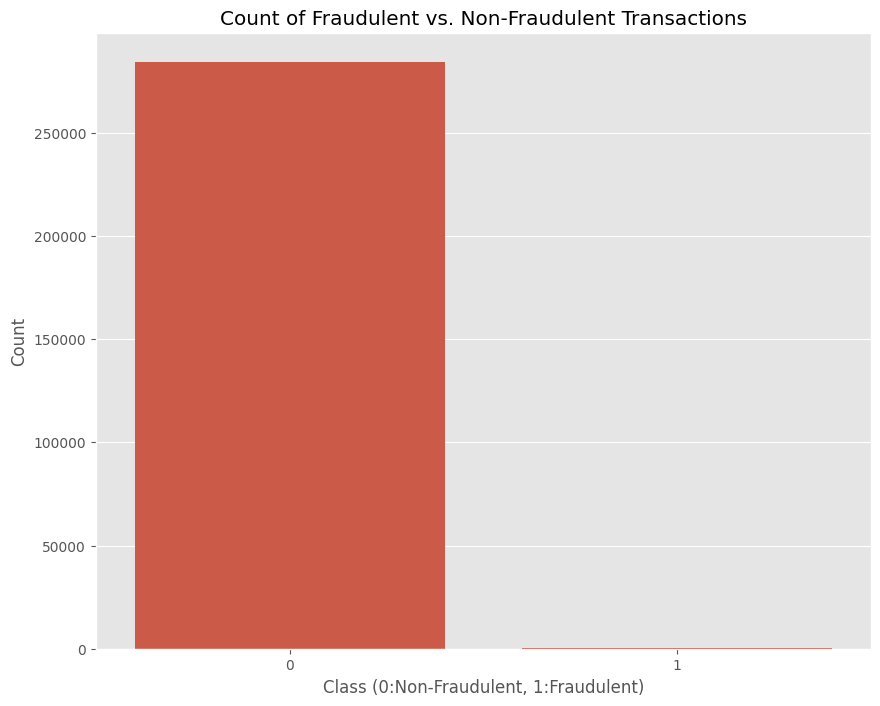

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1.0, 'Heatmap of Correlation')

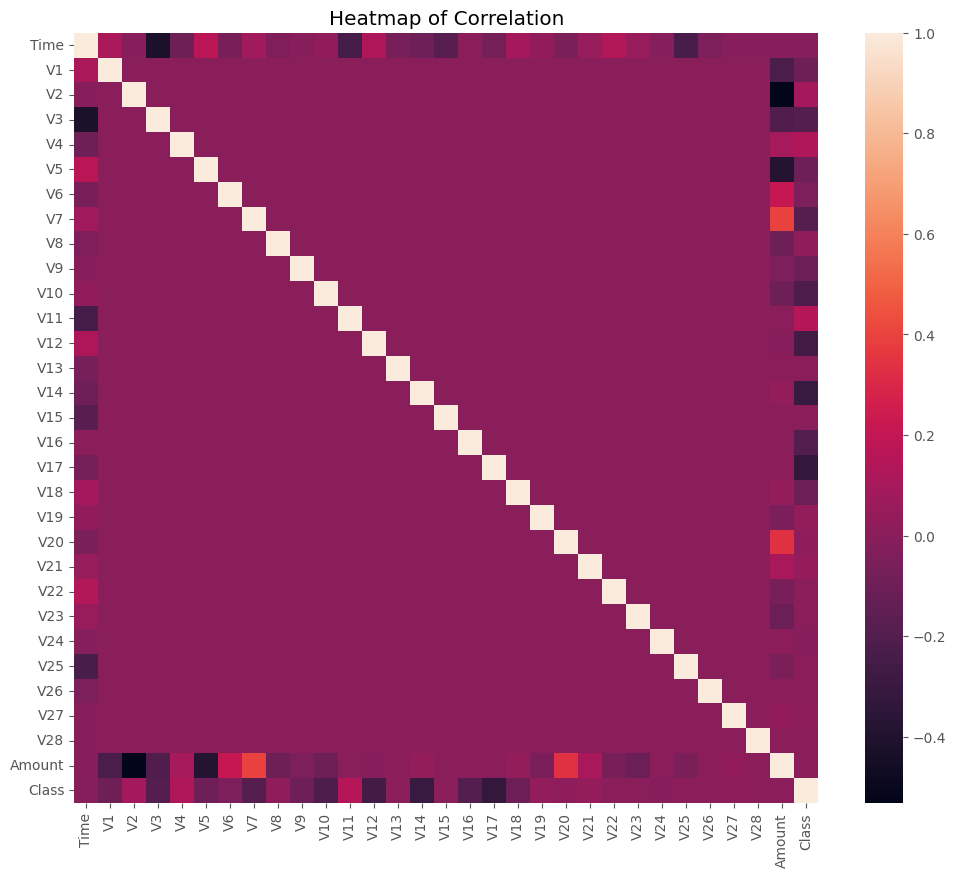

In [9]:
#finding correlation between columns and plotting heatmap

corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
data=df.copy()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Model-1(Over Sampling)**

In [14]:
# Create two different dataframes of majority and minority class
df_fraud = data[data.Class==1]
df_non_fraud = data[data.Class==0]

# Oversample the minority class
from sklearn.utils import resample
df_fraud_oversampled = resample(df_fraud,
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_non_fraud) , # to match majority class with len(df_majority) rows
                                 random_state=42)  # reproducible results

# Combine majority class with oversampled minority class
df_oversampled = pd.concat([df_fraud_oversampled, df_non_fraud])

In [1]:
df_oversampled.Class.value_counts()

NameError: name 'df_oversampled' is not defined

In [ ]:
g = sns.countplot(df_oversampled.Class)
g.set_xticklabels(['Non_Fraudulent','Fraudulent'])

KeyboardInterrupt: 

In [ ]:
# Target y and features X for developing NN models
y = df_oversampled.Class
X = df_oversampled.drop(['Class'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
# split the data (X, y) to train-data and test-data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [ ]:
X_train.shape, X_test.shape

((398041, 30), (170589, 30))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape, X_test.shape

((398041, 30, 1), (170589, 30, 1))

In [ ]:
epochs=20
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D((2)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 26, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 11, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       360,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 380,161 (1.45 MB)

 Trainable params: 380,161 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model as usual
model_cnn.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# Train the model
history = model_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.9929 - loss: 0.0228 - val_accuracy: 0.9987 - val_loss: 0.0070
Epoch 2/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.9989 - loss: 0.0054 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 3/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 4/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 0.9996 - val_loss: 0.0027
Epoch 5/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9997 - val_loss: 0.0021
Epoch 6/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 7/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9987 - val_loss: 0.0139
Epoch 8/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 109s 9ms/step - accuracy:

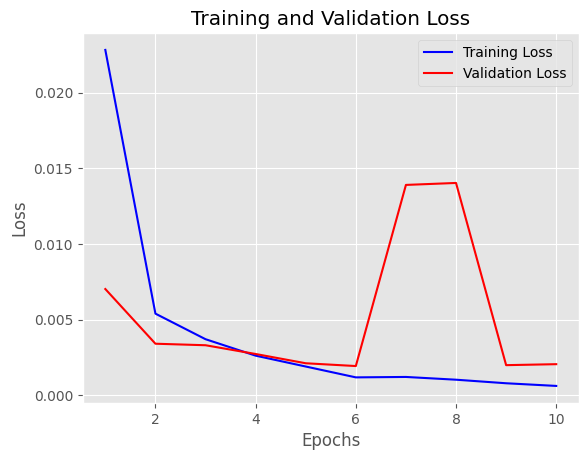

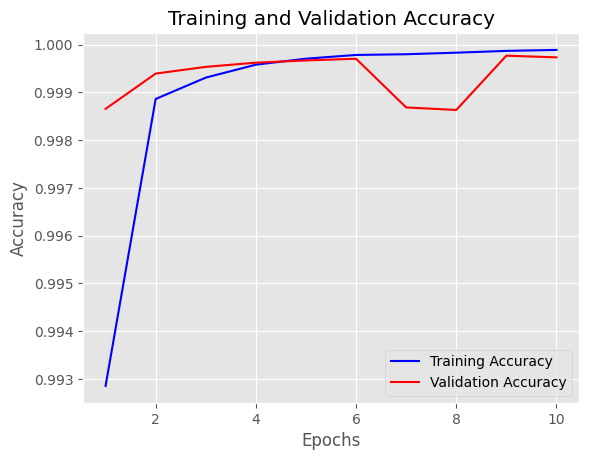

In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn_loss_plot.png')
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cnn_acc_plot.png')
plt.show()

In [ ]:
val_predictions = model_cnn.predict(X_test)
pred=np.around(val_predictions)
pred

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], shape=(170589, 1), dtype=float32)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



**Model 2-MAX pooling**

In [ ]:
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [ ]:
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((227845, 31), (56962, 31))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape, X_test.shape

((227845, 31, 1), (56962, 31, 1))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [ ]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 30, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 29, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 29, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1856)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       118,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,553 (482.63 KB)

 Trainable params: 123,361 (481.88 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9846 - loss: 0.0500 - val_accuracy: 0.9993 - val_loss: 0.0057
Epoch 2/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 0.9992 - loss: 0.0057 - val_accuracy: 0.9993 - val_loss: 0.0047
Epoch 3/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.9993 - loss: 0.0048 - val_accuracy: 0.9993 - val_loss: 0.0045
Epoch 4/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9993 - loss: 0.0049 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 5/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.9993 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 6/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 7/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9993 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 8/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9993 - loss: 0

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

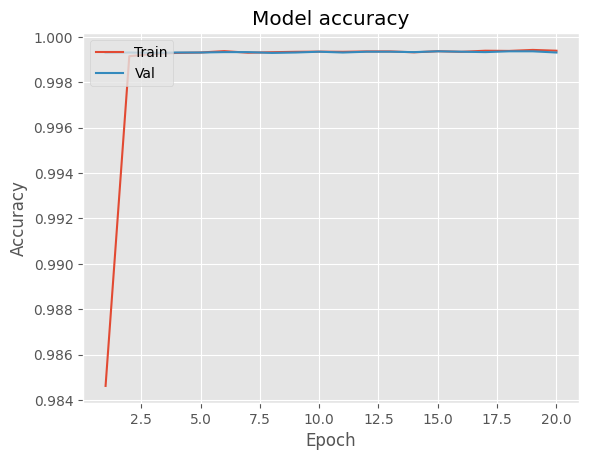

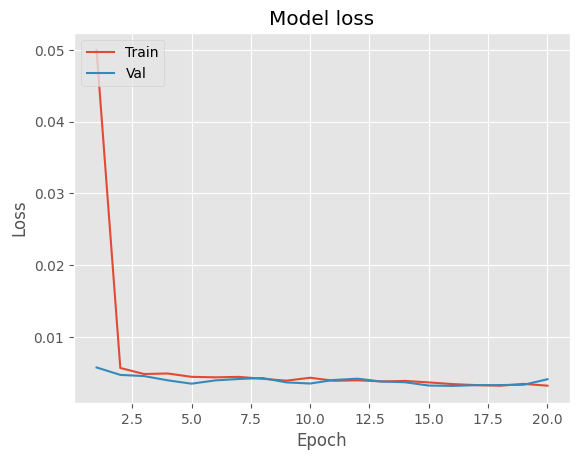

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
val_predictions = model.predict(X_test)
pred=np.around(val_predictions)
pred

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], shape=(56962, 1), dtype=float32)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.76      0.79        98

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



**Model 3- DNN Weighted Neural Network**

****

In [ ]:
print(X.shape)
print(y.shape)

(284807, 31)
(284807,)


In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=.3)

In [ ]:
train_data, validation_data, train_targets, validation_targets = train_test_split(train_data, train_targets, test_size=.2)

In [ ]:
mean = np.mean(train_data)
std = np.std(train_data)


train_data -= mean
train_data /= std

validation_data -= mean
validation_data /= std

test_data -= mean
test_data /= std

In [ ]:
from keras import models, layers

In [ ]:
epochs=20
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469 (1.83 KB)

 Trainable params: 469 (1.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data, train_targets, epochs=epochs, validation_data=(test_data, test_targets), verbose=1)

Epoch 1/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9978 - loss: 0.5336 - val_accuracy: 0.9983 - val_loss: 0.0484
Epoch 2/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9982 - loss: 0.0628 - val_accuracy: 0.9983 - val_loss: 0.0541
Epoch 3/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9977 - loss: 0.1042 - val_accuracy: 0.9983 - val_loss: 0.0145
Epoch 4/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9979 - loss: 0.0876 - val_accuracy: 0.9983 - val_loss: 0.0346
Epoch 5/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9978 - loss: 0.0951 - val_accuracy: 0.9977 - val_loss: 0.1610
Epoch 6/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9979 - loss: 0.0797 - val_accuracy: 0.9983 - val_loss: 0.0346
Epoch 7/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9979 - loss: 0.1138 - val_accuracy: 0.9983 - val_loss: 0.0612
Epoch 8/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9980 - loss: 0.

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

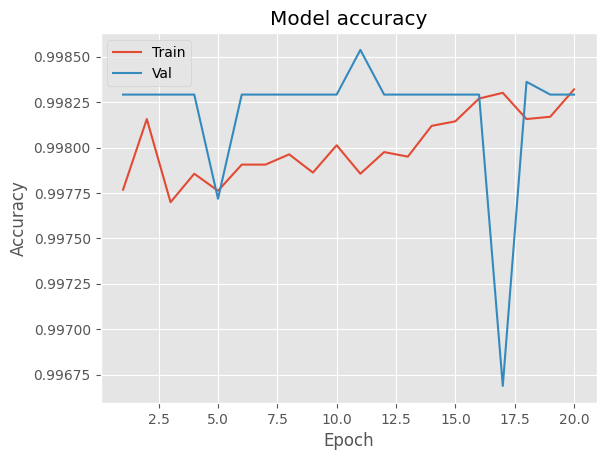

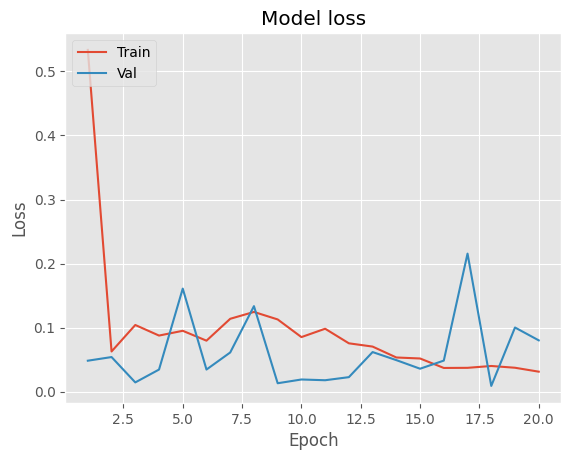

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
val_predictions = model.predict(test_data)
pred=np.around(val_predictions)
pred

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], shape=(85443, 1), dtype=float32)

In [ ]:
print(classification_report(test_targets, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.00      0.00      0.00       146

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
train_targets.value_counts()

Class
0    159212
1       279
Name: count, dtype: int64

There are 278 1's (frauds) and 159213 0's (non-frauds)

159213/278 = 572.7

0's are 572.7 times more than 1's

We can assign custom weights to NN accordingly

In [ ]:
weights = {
    0:1,
    1:562
}

In [ ]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# CHANGE
history = model.fit(train_data, train_targets, epochs=epochs, validation_data=(test_data, test_targets), verbose=1, class_weight=weights)

Epoch 1/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7536 - loss: 2.1525 - val_accuracy: 0.9983 - val_loss: 0.6791
Epoch 2/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9983 - loss: 1.3739 - val_accuracy: 0.9983 - val_loss: 0.6812
Epoch 3/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9983 - loss: 1.3736 - val_accuracy: 0.9983 - val_loss: 0.6807
Epoch 4/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - accuracy: 0.9983 - loss: 1.3736 - val_accuracy: 0.9983 - val_loss: 0.6807
Epoch 5/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9856 - loss: 1.3738 - val_accuracy: 0.9983 - val_loss: 0.6884
Epoch 6/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9983 - loss: 1.3734 - val_accuracy: 0.9983 - val_loss: 0.6877
Epoch 7/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9983 - loss: 1.3734 - val_accuracy: 0.9983 - val_loss: 0.6870
Epoch 8/20
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9983 - loss: 1

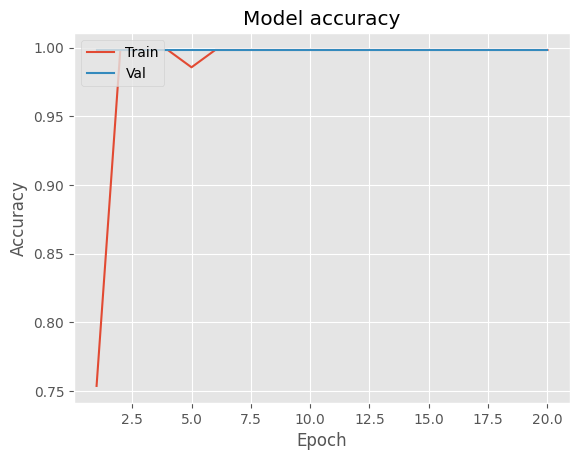

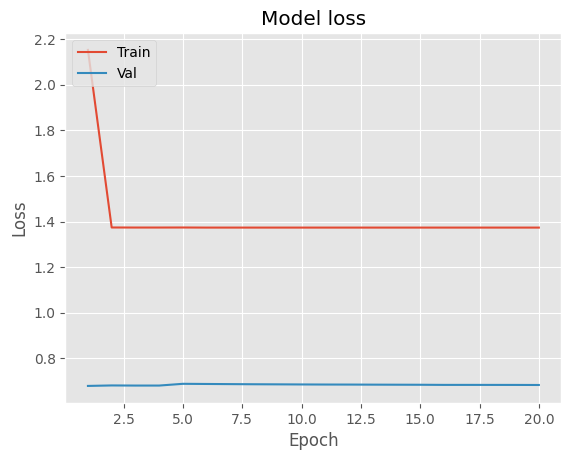

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
score = model.evaluate(test_data, test_targets, batch_size=100)
print('\nAnd the Score is ', score[1] * 100, '%')

855/855 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9983 - loss: 0.6832

And the Score is  99.82912540435791 %


In [ ]:
predictions = model.predict(test_data)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_targets, predictions)

0.5

In [ ]:
predictions = np.around(predictions)

In [ ]:
print(classification_report(test_targets, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.00      0.00      0.00       146

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



**LSTM**

In [ ]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from tensorflow.keras.backend import cast

In [ ]:
data = pd.read_csv("D:\Projects\CreditCard\creditcard.csv")
col_del = ['Time' ,'V5', 'V6', 'V7', 'V8', 'V9','V13','V15', 'V16',  'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [ ]:
tr_data = data.drop(col_del,axis =1)
tr_data.shape

(284807, 10)

In [ ]:
X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']

In [ ]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['Class'] == label)[0]

Counter({0: 284315, 1: 492})


In [ ]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 284315})


In [ ]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [ ]:
X_train.shape

(398041, 9)

In [ ]:
X_test.shape

(170589, 9)

In [ ]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_LSTM_X=X_train
val_LSTM_X=X_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

## Recuperation des labels
train_LSTM_y=y_train
val_LSTM_y=y_test

In [ ]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")
        super(attention, self).build(input_shape)

    def call(self, x):
        et = tf.squeeze(tf.tanh(tf.matmul(x, self.W) + self.b), axis=-1)
        at = tf.nn.softmax(et)
        at = tf.expand_dims(at, axis=-1)
        output = x * at
        return tf.reduce_sum(output, axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
inputs1=Input((1,9))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 512

In [ ]:
history = model1.fit(train_LSTM_X, train_LSTM_y, epochs=20, batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y), verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.7893 - loss: 0.6719 - val_accuracy: 0.8851 - val_loss: 0.6336
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.8838 - loss: 0.5839 - val_accuracy: 0.8868 - val_loss: 0.5059
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.8845 - loss: 0.4483 - val_accuracy: 0.8938 - val_loss: 0.3720
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8950 - loss: 0.3404 - val_accuracy: 0.9047 - val_loss: 0.2951
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9050 - loss: 0.2866 - val_accuracy: 0.9090 - val_loss: 0.2584
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9116 - loss: 0.2583 - val_accuracy: 0.9099 - val_loss: 0.2331
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9153 - loss: 0.2410 - val_accuracy: 0.9173 - val_loss: 0.2157
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.9179 - loss: 0.2293 - val_accuracy: 0.9239 - 

In [ ]:
# evaluate the model
_, train_acc = model1.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model1.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.935, Test: 0.933


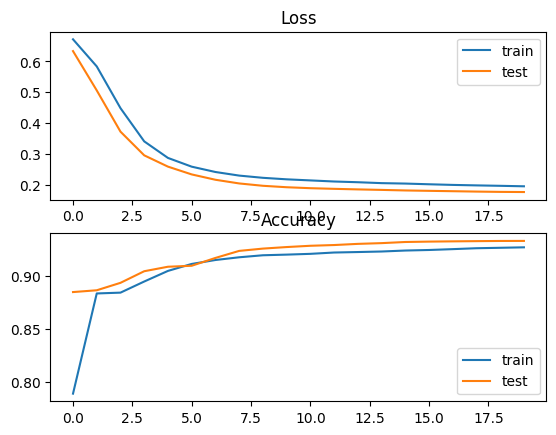

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
model1.save("attention_lstm_model.h5")

In [ ]:
import pandas as pd

df = pd.read_csv('D:\Projects\CreditCard\creditcard.csv')
non_fraud_df = df[df['Class'] == 0]  # Class 0 = legitimate

In [ ]:
# Use row indices as IDs if there's no 'TransactionID' column
non_fraud_ids = non_fraud_df.index.tolist()

# Pick a few sample IDs
sample_ids = non_fraud_ids[:5]  # First 5 legitimate transactions

In [ ]:
X_samples = df.loc[sample_ids].drop('Class', axis=1).values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
joblib.dump(scaler, 'scaler.pkl')  # This creates the file

['scaler.pkl']

In [ ]:
import joblib

scaler = joblib.load(r'D:\Projects\CreditCard\scaler.pkl')

In [ ]:
import joblib
scaler = joblib.load('scaler.pkl')
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'Amount']
X_samples = df.loc[sample_ids, selected_features].values
X_scaled = scaler.transform(X_samples).reshape(len(X_samples), 1, len(selected_features))
X_train = df[selected_features].values

NameError: name 'df' is not defined